In [31]:
import tensorflow as tf
import tensorflow.keras as keras
import os, shutil

In [3]:
from tensorflow.keras import models, layers, optimizers, losses

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [7]:
!pwd

/notebooks/sharedfolder/work/deep-learning-keras


In [28]:
train_dir = '/notebooks/sharedfolder/work/data/cats_and_dogs_small/train'
validation_dir = '/notebooks/sharedfolder/work/data/cats_and_dogs_small/validation'

train_cats_dir = '/notebooks/sharedfolder/work/data/cats_and_dogs_small/train/cats'

In [14]:
## data preprocessing before training
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [24]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
 99/100 [============================>.] - ETA: 0s - loss: 0.5413 - acc: 0.7217

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expe

100/100 [==============================] - 19s 190ms/step - loss: 0.5409 - acc: 0.7225 - val_loss: 0.5699 - val_acc: 0.6840
Epoch 2/30
100/100 [==============================] - 16s 162ms/step - loss: 0.5132 - acc: 0.7515 - val_loss: 0.5692 - val_acc: 0.6950
Epoch 3/30
100/100 [==============================] - 16s 161ms/step - loss: 0.4818 - acc: 0.7645 - val_loss: 0.5734 - val_acc: 0.7010
Epoch 4/30
100/100 [==============================] - 16s 161ms/step - loss: 0.4517 - acc: 0.7870 - val_loss: 0.6265 - val_acc: 0.6750
Epoch 5/30
100/100 [==============================] - 16s 161ms/step - loss: 0.4324 - acc: 0.7985 - val_loss: 0.5565 - val_acc: 0.7170
Epoch 6/30
100/100 [==============================] - 16s 161ms/step - loss: 0.4023 - acc: 0.8240 - val_loss: 0.5481 - val_acc: 0.7250
Epoch 7/30
100/100 [==============================] - 16s 160ms/step - loss: 0.3782 - acc: 0.8255 - val_loss: 0.5624 - val_acc: 0.7220
Epoch 8/30
100/100 [==============================] - 16s 162ms/st

In [25]:
model.save('cats_and_dogs_small_1.h5')

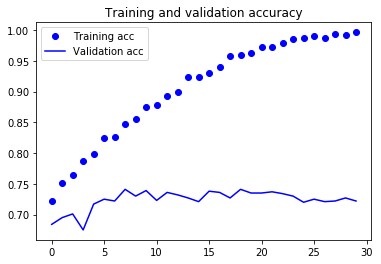

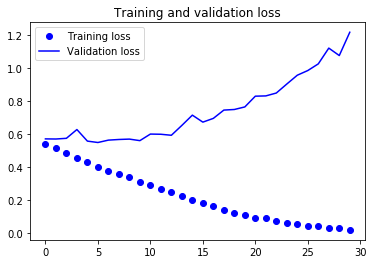

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
## image augmentation
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

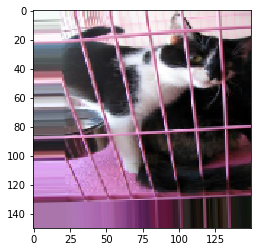

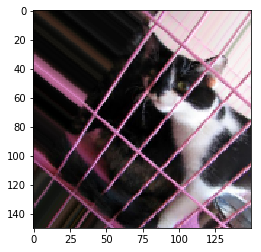

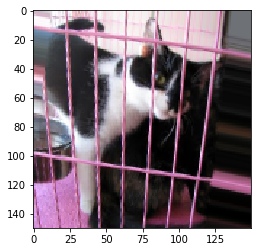

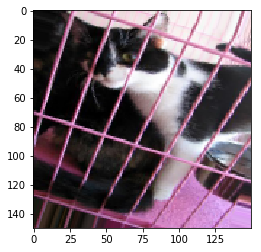

In [33]:
## image augmentation
from tensorflow.keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()